# Classification of a Sentinel-2 image
* by Giorgos Triantafyllou (5381738) and Lisa Geers (5351421)
* Geo1001 Assignment 2
* October 5, 2020

# Introduction
This project was executed to investigate different classification methods to classify a Sentinel-2 image. This was done using a satellite image of the area around Delft, taken on May 30, 2020 by a Sentinel-2 satellite. Both the 10 meters resolution and the 60 resolution were used in this project. In the 10 meter spatial resolution, bands 2 (Blue), 3 (Green), 4 (Red), and 8 (Near Infrared) were used. For the 60 meters resolution, bands 2,3,4,8A (Narrow Near Infrared) were used. Classification was done using the k-means clustering method of the library scikit-learn. Visualisation was done with the use of Matplotlib. Different parameters and band combinations were investigated and visualised using Python 3.7. 
We both spend around 4 days on this project, which is 36 hours each. 

# 60 m resolution

In [2]:
# imports
import rasterio
from rasterio.plot import show
from rasterio.windows import Window
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#get and read the data 
b2 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B02_60m.jp2')
B2 = np.empty((b2.height, b2.width, b2.count), b2.meta['dtype'])

b3 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B03_60m.jp2')
B3 = np.empty((b3.height, b3.width, b3.count), b3.meta['dtype'])

b4 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B04_60m.jp2')
B4 = np.empty((b4.height, b4.width, b4.count), b4.meta['dtype'])

b8 = rasterio.open('..\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211\S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE\GRANULE\L2A_T31UET_A025788_20200530T105134\IMG_DATA\R60m\T31UET_20200530T105031_B8A_60m.jp2')
B8A = np.empty((b8.height, b8.width, b8.count), b8.meta['dtype'])

for band in range(B2.shape[2]):
    B2[:,:,band] =  b2.read(band+1)
    B3[:,:,band] =  b3.read(band+1)
    B4[:,:,band] =  b4.read(band+1)
    B8A[:,:,band] =  b8.read(band+1)
# stack bands together
all_bands = np.dstack((B2, B3, B4, B8A))
# make 1D array for all bands
all_bands_1d = all_bands[:,:,:].reshape((all_bands.shape[0]*all_bands.shape[1],all_bands.shape[2]))

In [ ]:
fig = plt.figure()
fig.suptitle("60 m resolution scatterplots")
ax1 = fig.add_subplot(121)
ax1.scatter(all_bands_1d[:,0], all_bands_1d[:,1])
ax1.set_title('Band 2 and 3')
ax1.set_ylabel("Band 2")
ax1.set_xlabel("Band 3")

ax3 = fig.add_subplot(122)
ax3.scatter(all_bands_1d[:,2], all_bands_1d[:,3])
ax3.set_title('Band 4 and 8')
ax3.set_ylabel("Band 4")
ax3.set_xlabel("Band 8")

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
### Visualising data with imshow

Same report here as well with the only difference that the band 8A were used instead of band 8

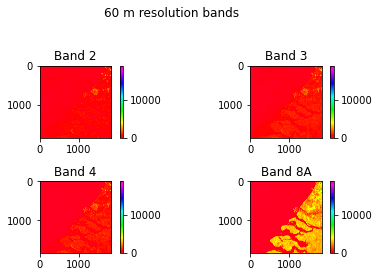

In [5]:
min_value = all_bands.min()
max_value = all_bands.max()

# plot bands seperately
fig = plt.figure()
fig.suptitle("60 m resolution bands")
ax1 = fig.add_subplot(221)
im = ax1.imshow(all_bands[:,:,0], cmap='gist_rainbow')
im.set_clim(min_value, max_value)
ax1.set_title('Band 2')
fig.colorbar(im, ax=ax1)

ax2 = fig.add_subplot(222)
im = ax2.imshow(all_bands[:,:,1], cmap='gist_rainbow')
im.set_clim(min_value, max_value)
ax2.set_title('Band 3')
fig.colorbar(im, ax=ax2)

ax3 = fig.add_subplot(223)
im = ax3.imshow(all_bands[:,:,2], cmap='gist_rainbow')
im.set_clim(min_value, max_value)
ax3.set_title('Band 4')
fig.colorbar(im, ax=ax3)

ax4 = fig.add_subplot(224)
im = ax4.imshow(all_bands[:,:,3], cmap='gist_rainbow')
im.set_clim(0, 12000)
ax4.set_title('Band 8')
fig.colorbar(im, ax=ax4)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

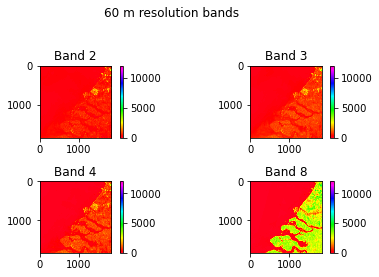

In [6]:
# plot bands seperately
fig = plt.figure()
fig.suptitle("60 m resolution bands")
ax1 = fig.add_subplot(221)
im = ax1.imshow(all_bands[:,:,0], cmap='gist_rainbow')
im.set_clim(0, 12000)
ax1.set_title('Band 2')
fig.colorbar(im, ax=ax1)

ax2 = fig.add_subplot(222)
im = ax2.imshow(all_bands[:,:,1], cmap='gist_rainbow')
im.set_clim(0, 12000)
ax2.set_title('Band 3')
fig.colorbar(im, ax=ax2)

ax3 = fig.add_subplot(223)
im = ax3.imshow(all_bands[:,:,2], cmap='gist_rainbow')
im.set_clim(0, 12000)
ax3.set_title('Band 4')
fig.colorbar(im, ax=ax3)

ax4 = fig.add_subplot(224)
im = ax4.imshow(all_bands[:,:,3], cmap='gist_rainbow')
im.set_clim(0, 12000)
ax4.set_title('Band 8')
fig.colorbar(im, ax=ax4)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
Also the same report can be used.

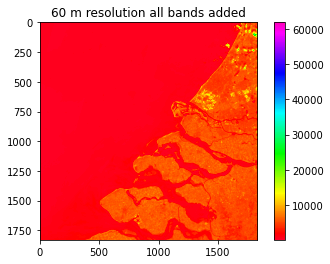

In [4]:
# plot summed bands
plt.figure()
plt.title("60 m resolution all bands added")
plt.imshow((all_bands[:,:,0]+all_bands[:,:,1]+all_bands[:,:,2]+all_bands[:,:,3]), cmap='gist_rainbow')
plt.colorbar()
plt.show()

As about the whole area shown in the 60m resolution image using the NDVI we could say that mostly positive values are shown in the land area despite the huge area of negative values which is obviously the ocean. No great conclusions can be extract because with NDVI it is hard to classify the urban areas which are getting confused with vegetation.

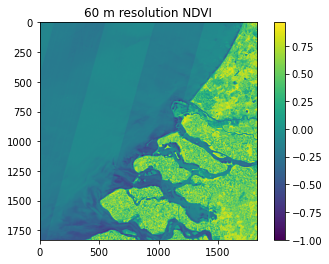

In [5]:
# calculate NDVI
ndvi = (B8A[:,:,0].astype(float) - B4[:,:,0].astype(float)) / (B8A[:,:,0] + B4[:,:,0])

# plot NDVI
plt.figure()
plt.title("60 m resolution NDVI")
plt.imshow(ndvi)
plt.colorbar()
plt.show()

# Parameters

##  Different number of clusters
In the next plot it is shown the results after using different number of clusters in order to realize which one fits better to our area of interest. After a first look in to the area from the google maps we see that the main clusterize could be done related to the water body, agricultural fields and urban area. That could mean 3 clusters although there are different as we can see below the 3 clusters are not enough to cover the information because for example in some places the land it gets even confused with the water. The cluster size should also be not too large, because this makes the plot unclear and might give one land use multiple cluster values as we can see in the plots with the biggest cluster size. Based on these maybe the 56 clusters are fits better for the image, but still it is not the best result cause still there are confusios.

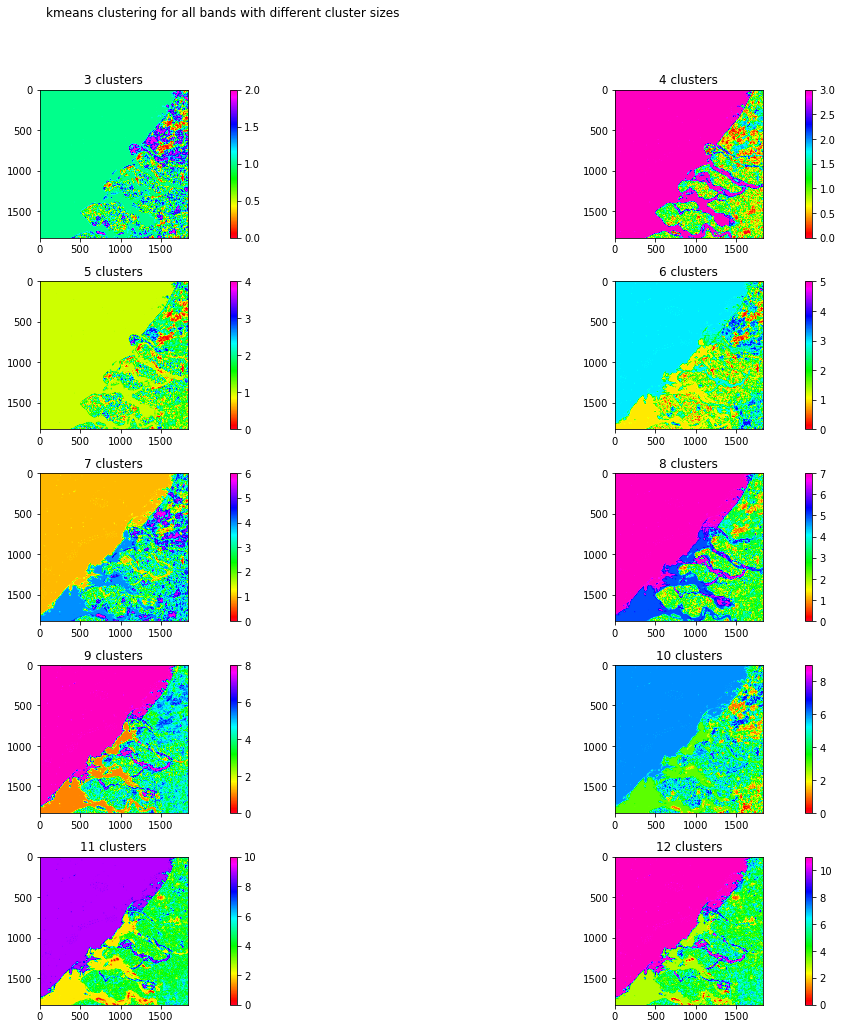

In [8]:
# calculate k-means clusters with different clustersizes
clusterlist = []
for i in range(3, 13):
    cl = cluster.KMeans(init='random', n_clusters=i)
    param = cl.fit(all_bands_1d) 
    img_cl = cl.labels_ 
    img_cl = img_cl.reshape(all_bands[:,:,0].shape) 
    clusterlist.append(img_cl)

# plot all k-means clusters
fig, axs = plt.subplots(5, 2, figsize=[20,15])
axs = axs.ravel()
fig.suptitle("kmeans clustering for all bands with different cluster sizes")

for i in range(len(clusterlist)):
    im = axs[i].imshow(clusterlist[i], cmap='gist_rainbow')
    axs[i].set_title(f'{i+3} clusters')
    fig.colorbar(im, ax=axs[i])

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Different runtimes
**same first 4 sentences like in your report**

However, as shown in the plot below, we can see that with less runtimes the result is confused especially with the 10 iterations. The same happens also with the highest runtimes plus the fact that the project need even more time to run. The best cluster output comes from the 30 iteration were looks that most of the information to be set in different clusters are set as suppose to be.

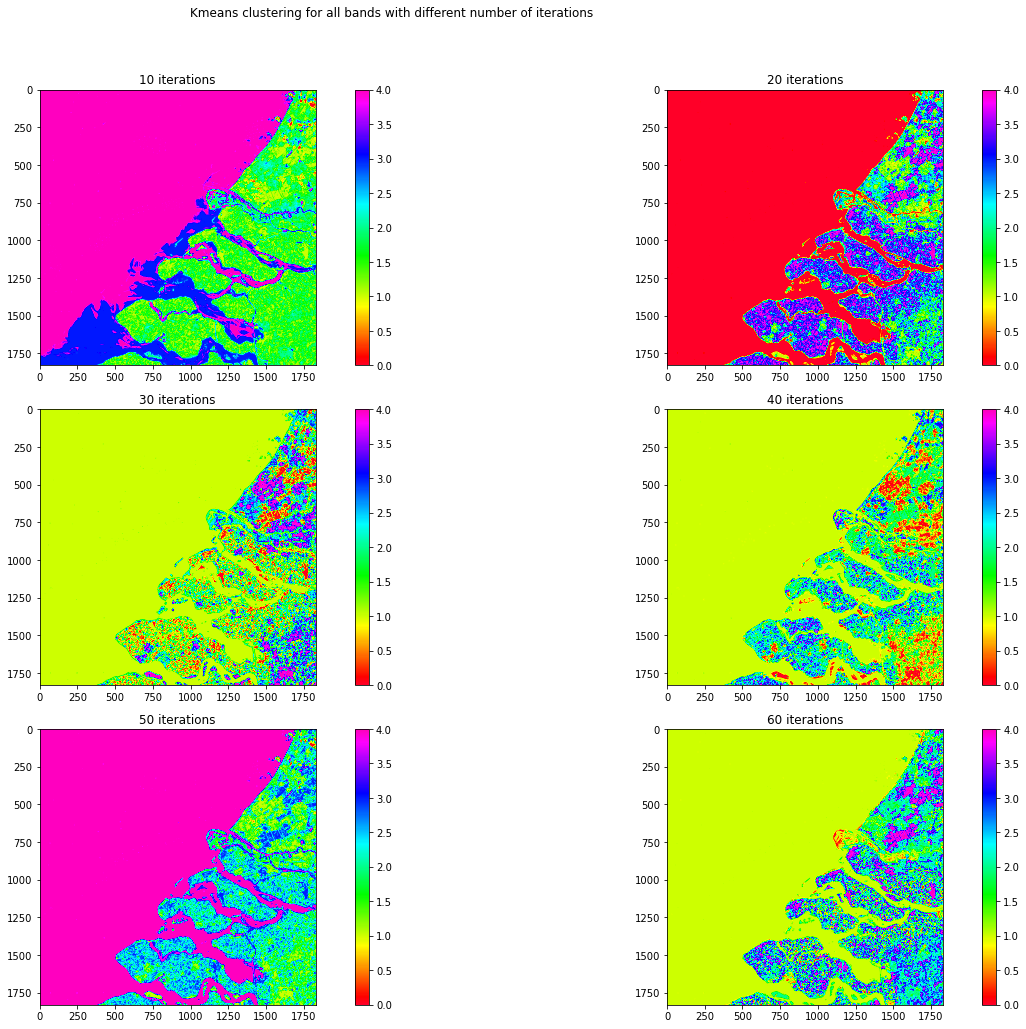

In [7]:
# calculate k-means clusters with different clustersizes
clusterlist = []
for i in range(1, 7):
    cl = cluster.KMeans(init='random', n_clusters=5, n_init=(i*10))
    param = cl.fit(all_bands_1d) 
    img_cl = cl.labels_ 
    img_cl = img_cl.reshape(all_bands[:,:,0].shape) 
    clusterlist.append(img_cl)

# plot all k-means clusters
fig, axs = plt.subplots(3, 2, figsize=[20,15])
axs = axs.ravel()
fig.suptitle("Kmeans clustering for all bands with different number of iterations")

for i in range(len(clusterlist)):
    im = axs[i].imshow(clusterlist[i], cmap='gist_rainbow')
    axs[i].set_title(f'{(i+1)*10} iterations')
    fig.colorbar(im, ax=axs[i])

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Different initialization method
***same first 2 sentences***

The plots below show that there is some difference in output of the two methods. Although we were waiting the k-means++ method to perfome better, we see that the random function gives better results as the classification seems more clear and correct. In that case, k-means++ method might be faster but it doesnt give us good enough results as we can see cause it confuses some clusters, for example the greenhouses of Westland with the agriculture fields.

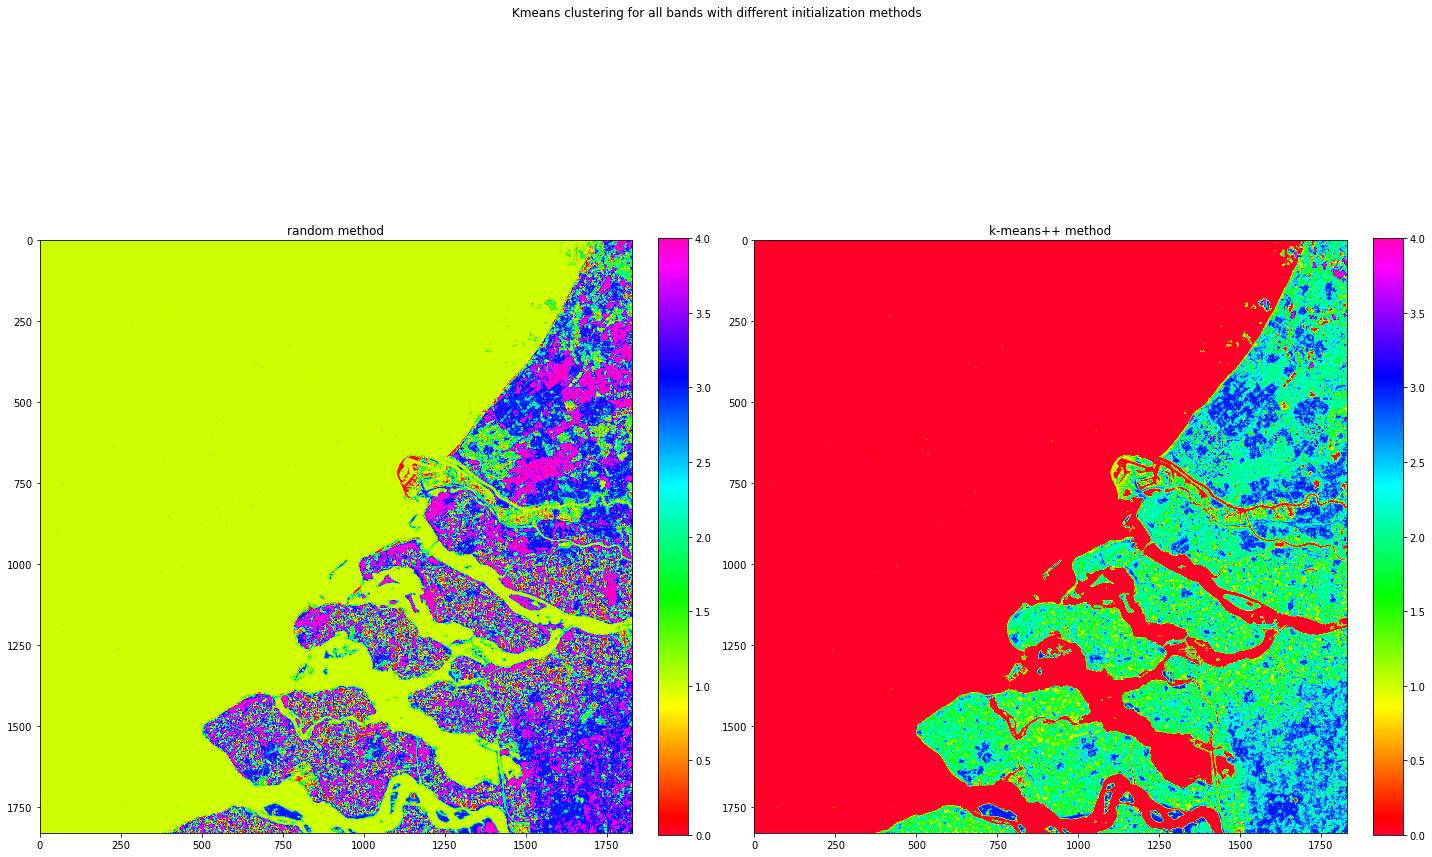

In [6]:
# calculate k-means clusters with different init method
clusterlist = []
init_list = ["random", "k-means++"]
for init in init_list:
    cl = cluster.KMeans(init=init, n_clusters=5)
    param = cl.fit(all_bands_1d) 
    img_cl = cl.labels_ 
    img_cl = img_cl.reshape(all_bands[:,:,0].shape) 
    clusterlist.append(img_cl)

# plot all k-means clusters
fig, axs = plt.subplots(1, 2, figsize=[20,15])
axs = axs.ravel()
fig.suptitle("Kmeans clustering for all bands with different initialization methods")

for i in range(len(clusterlist)):
    im = axs[i].imshow(clusterlist[i], cmap='gist_rainbow')
    axs[i].set_title(f'{init_list[i]} method')
    fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)

fig.tight_layout()
plt.show()

## Bands separately
Same report from what i see too

In [11]:
# make list with seperate bands
bandlist = [B2, B3, B4, B8A]
band_alone_list = []

for band in bandlist:
    band_alone = band.flatten()
    band_alone = band_alone.reshape(-1, 1)
    band_alone_list.append(band_alone)

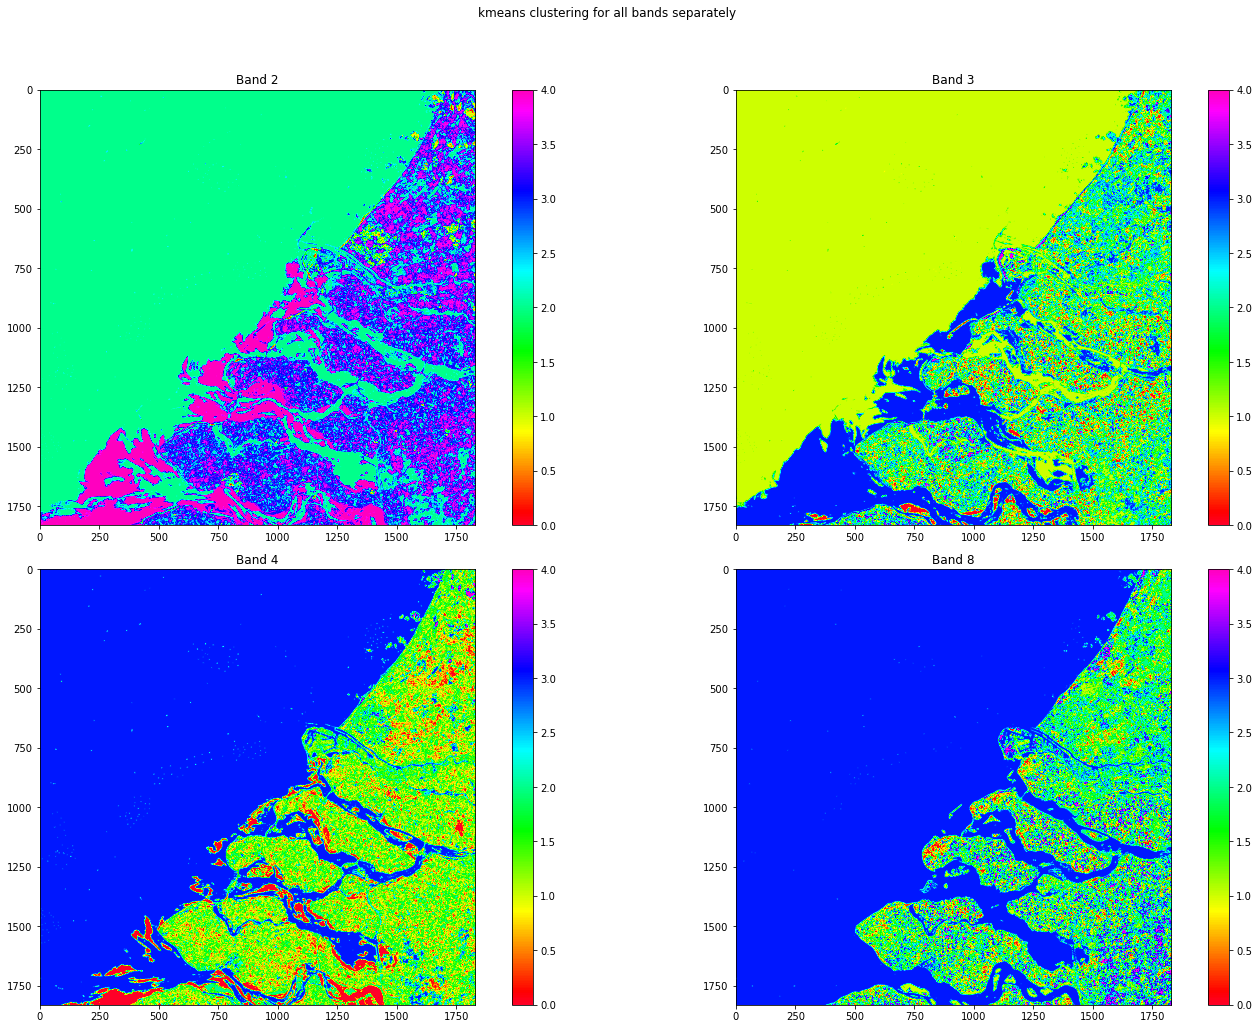

In [12]:
# calculate k-means clusters with different bands
clusterlist = []
for band in band_alone_list:
    cl = cluster.KMeans(init='random', n_clusters=5)
    param = cl.fit(band) 
    img_cl = cl.labels_ 
    img_cl = img_cl.reshape(all_bands[:,:,0].shape) 
    clusterlist.append(img_cl)

# plot all k-means clusters
bandnames = ['Band 2', 'Band 3', 'Band 4', 'Band 8']
fig, axs = plt.subplots(2, 2, figsize=[20,15])
axs = axs.ravel()
fig.suptitle("kmeans clustering for all bands separately")

for i in range(len(clusterlist)):
    im = axs[i].imshow(clusterlist[i], cmap='gist_rainbow')
    axs[i].set_title(f'{bandnames[i]}')
    fig.colorbar(im, ax=axs[i])

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
Also exactly same with yours.

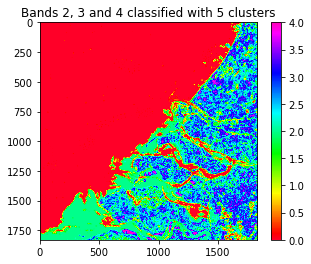

In [13]:
# make array with only RBG bands
B234 = np.dstack((B2, B3, B4))
B234_1d = B234[:,:,:].reshape((B234.shape[0]* B234.shape[1], B234.shape[2]))

# calculate k-means clusters
cl = cluster.KMeans(init='random', n_clusters=5)
param = cl.fit(B234_1d) 
img_cl = cl.labels_ 
img_cl = img_cl.reshape(B234[:,:,0].shape) 

# plot clusters
plt.figure()
plt.title("Bands 2, 3 and 4 classified with 5 clusters")
plt.imshow(img_cl, cmap='gist_rainbow')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

## NDVI
The below plot shows the k-means clusters calculated for the NDVI. The classification is mostly wrong cause even some poarts of the water body are confused in another cluster. The urban areas and the agriculture and vegetation areas are also are not correct at all.

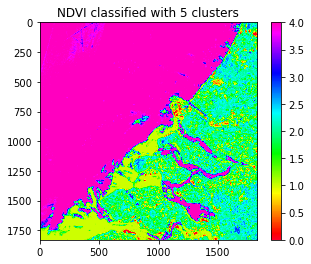

In [14]:
# calculate k-means clusters of NDVI array
cl = cluster.KMeans(init='random', n_clusters=5)
param = cl.fit(ndvi.flatten().reshape(-1, 1)) 
img_cl = cl.labels_ 
img_cl = img_cl.reshape(B234[:,:,0].shape) 

# plot all k-means clusters
plt.figure()
plt.title("NDVI classified with 5 clusters")
plt.imshow(img_cl, cmap='gist_rainbow')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

## Colorized Infrared
Below the k-means clusters for the colorized infrared bands are visualised. Colorized infrared can be used to highlight vegetation and contains the bands green (3), red (4) and infrared (8). The plot shows that the classification of the three identified land uses is wrong. The most important is that it confuses some water areas with vegetation and therefore it classifies it in the wrong cluster.

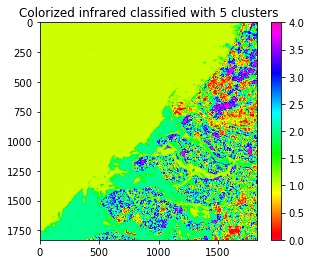

In [7]:
# make colorized IR array
B238 = np.dstack((B2, B3, B8A))
B238_1d = B238[:,:,:].reshape((B238.shape[0]* B238.shape[1], B238.shape[2]))

# calculate k-means clusters
cl = cluster.KMeans(init='random', n_clusters=5)
param = cl.fit(B238_1d) 
img_cl = cl.labels_ 
img_cl = img_cl.reshape(B238[:,:,0].shape) 

# plot k-means clusters
fig = plt.figure()
plt.title("Colorized infrared classified with 5 clusters")
plt.imshow(img_cl, cmap='gist_rainbow')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

## Sub-conclusion
Based on the initial visualisation plots of the bands, three land use types were identified. The water body, agricultural field and urban area should optimally be classified in different clusters. The parameters cluster size of 5, runtime of 30 and init random method were found to be the most optimal for this area. Finally the combination 2, 3, 4, 8A gave the best results.